In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


In [205]:
df = pd.read_csv("credit_risk_dataset.csv")

In [206]:
df.shape

(32581, 12)

In [207]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [208]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [209]:
df.duplicated().sum()

np.int64(165)

In [210]:
df.drop_duplicates(inplace=True)
df.shape

(32416, 12)

In [211]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,"32,416.00","32,416.00","31,529.00","32,416.00","29,321.00","32,416.00","32,416.00","32,416.00"
mean,27.75,"66,091.64",4.79,"9,593.85",11.02,0.22,0.17,5.81
std,6.35,"62,015.58",4.15,"6,322.73",3.24,0.41,0.11,4.06
min,20.00,"4,000.00",0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,"38,542.00",2.00,"5,000.00",7.90,0.00,0.09,3.00
50%,26.00,"55,000.00",4.00,"8,000.00",10.99,0.00,0.15,4.00
75%,30.00,"79,218.00",7.00,"12,250.00",13.47,0.00,0.23,8.00
max,144.00,"6,000,000.00",123.00,"35,000.00",23.22,1.00,0.83,30.00


### Person income 

In [212]:
df['loan_status'].value_counts()

loan_status
0    25327
1     7089
Name: count, dtype: int64

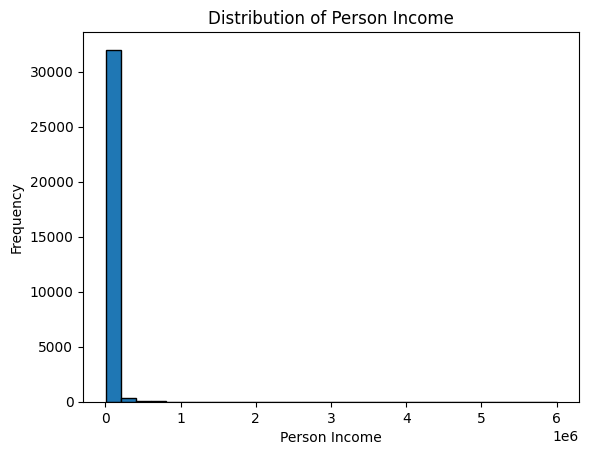

In [213]:
plt.hist(df['person_income'], bins=30, edgecolor='black')
plt.xlabel('Person Income')
plt.ylabel('Frequency')
plt.title('Distribution of Person Income')
plt.show()

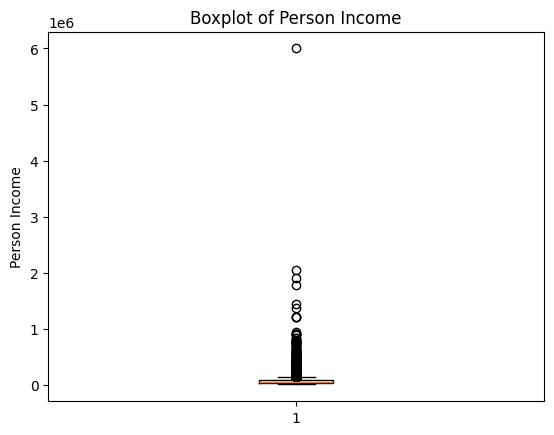

In [214]:
plt.boxplot(df['person_income'])
plt.ylabel('Person Income')
plt.title('Boxplot of Person Income')
plt.show()

Text(0.5, 1.0, 'Boxplot of Person Income without outliers')

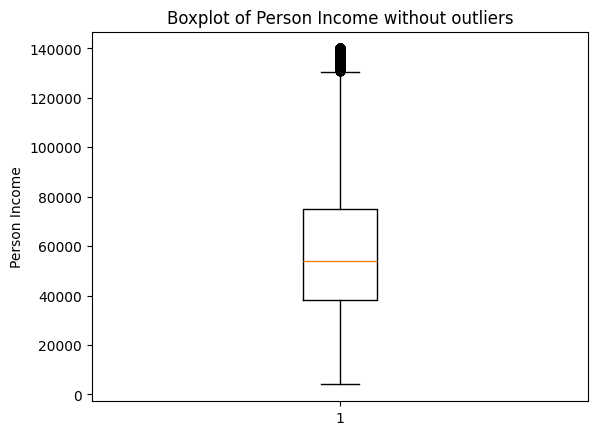

In [215]:
Q1 = df['person_income'].quantile(0.25)
Q3 = df['person_income'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['person_income'] >= (Q1 - 1.5 * IQR)) & (df['person_income'] <= (Q3 + 1.5 * IQR))]
plt.boxplot(df['person_income'])
plt.ylabel('Person Income')
plt.title('Boxplot of Person Income without outliers')

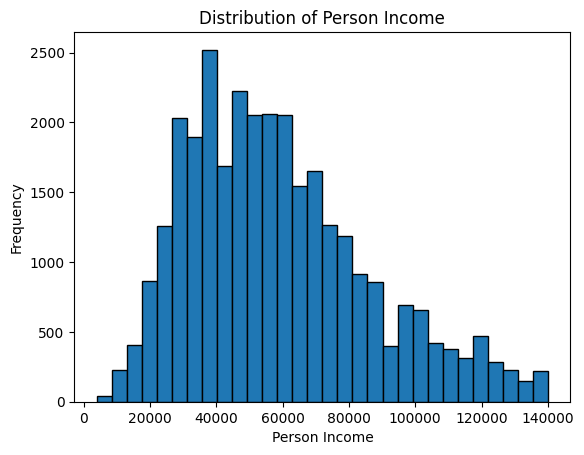

In [216]:
plt.hist(df['person_income'], bins=30, edgecolor='black')
plt.xlabel('Person Income')
plt.ylabel('Frequency')
plt.title('Distribution of Person Income')
plt.show()

In [217]:
df['person_income'].skew()

np.float64(0.7384018263648692)

Text(0.5, 0, 'Log of Person Income')

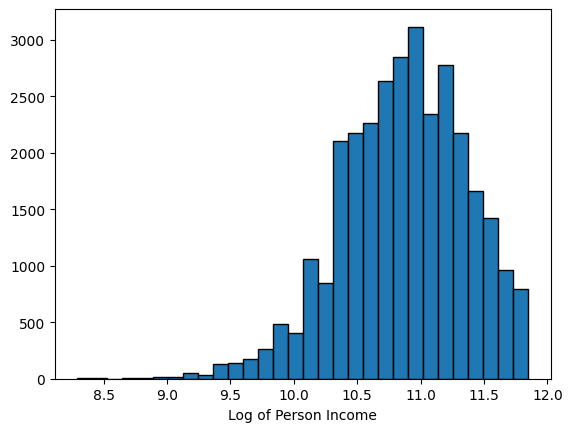

In [218]:
df['person_income'] = np.log(df['person_income'])
plt.hist(df['person_income'], bins=30, edgecolor='black')
plt.xlabel('Log of Person Income')      

In [219]:
df['person_income'].skew()

np.float64(-0.4447630491694093)

### Person age

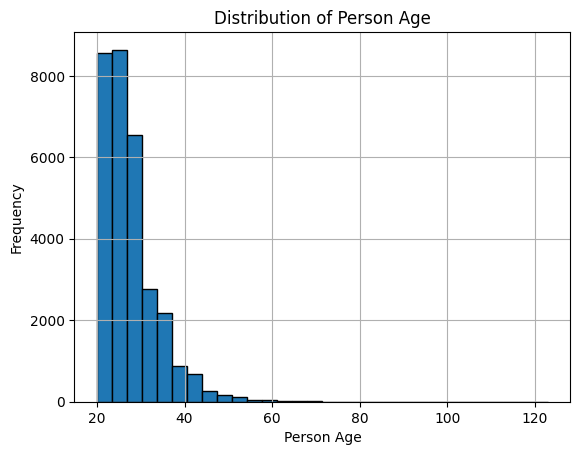

In [220]:
df['person_age'].hist(bins=30, edgecolor='black')
plt.xlabel('Person Age')
plt.ylabel('Frequency')
plt.title('Distribution of Person Age')
plt.show()


In [221]:
df['person_age'].value_counts().sort_index(ascending=True)

person_age
20       13
21     1198
22     3572
23     3787
24     3421
25     2884
26     2336
27     2021
28     1747
29     1568
30     1209
31     1067
32      892
33      806
34      657
35      578
36      500
37      441
38      353
39      278
40      240
41      223
42      166
43      148
44      132
45      104
46       86
47       85
48       73
49       46
50       48
51       35
52       33
53       29
54       22
55       20
56       12
57       14
58       16
59        4
60       13
61        6
62        7
63        2
64        7
65        9
66        8
69        5
70        7
73        3
76        1
78        1
80        1
84        1
94        1
123       2
Name: count, dtype: int64

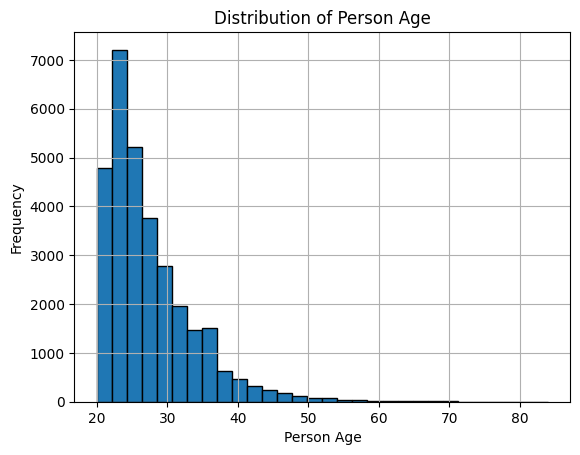

In [222]:
df = df[df['person_age'] < 85]
df['person_age'].hist(bins=30, edgecolor='black')
plt.xlabel('Person Age')
plt.ylabel('Frequency')
plt.title('Distribution of Person Age')
plt.show()

Text(0.5, 1.0, 'Boxplot of Person Age')

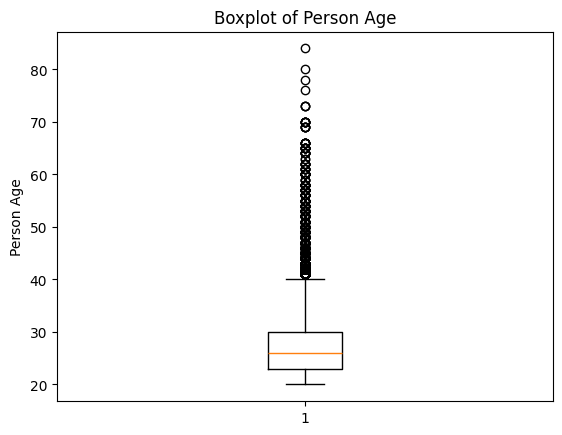

In [223]:
plt.boxplot(df['person_age'])
plt.ylabel('Person Age')
plt.title('Boxplot of Person Age')

In [224]:
bins = [20, 30, 40, 50, 60, 94]
labels = ['20-30', '30-40', '40-50', '50-60', '60+']
df['age_group'] = pd.cut(df['person_age'], bins=bins, labels=labels)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group
0,22,10.99,RENT,123.00,PERSONAL,D,35000,16.02,1,0.59,Y,3,20-30
1,21,9.17,OWN,5.00,EDUCATION,B,1000,11.14,0,0.10,N,2,20-30
2,25,9.17,MORTGAGE,1.00,MEDICAL,C,5500,12.87,1,0.57,N,3,20-30
3,23,11.09,RENT,4.00,MEDICAL,C,35000,15.23,1,0.53,N,2,20-30
4,24,10.90,RENT,8.00,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32575,52,11.07,RENT,0.00,EDUCATION,B,5000,11.26,0,0.08,N,20,50-60
32576,57,10.88,MORTGAGE,1.00,PERSONAL,C,5800,13.16,0,0.11,N,30,50-60
32577,54,11.70,MORTGAGE,4.00,PERSONAL,A,17625,7.49,0,0.15,N,19,50-60
32578,65,11.24,RENT,3.00,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,60+


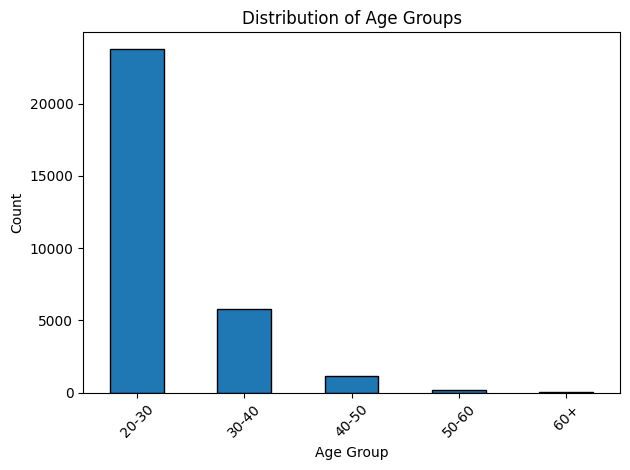

In [225]:
age_counts = df['age_group'].value_counts().sort_index()
age_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Employment length

In [226]:
df['person_emp_length'].value_counts().sort_index(ascending=True)

person_emp_length
0.00      3945
1.00      2793
2.00      3682
3.00      3299
4.00      2758
5.00      2807
6.00      2575
7.00      2118
8.00      1579
9.00      1257
10.00      641
11.00      666
12.00      514
13.00      387
14.00      283
15.00      220
16.00      148
17.00      114
18.00       91
19.00       55
20.00       36
21.00       34
22.00       16
23.00       10
24.00        8
25.00        8
26.00        4
27.00        5
28.00        3
29.00        1
31.00        1
34.00        1
38.00        1
41.00        1
123.00       1
Name: count, dtype: int64

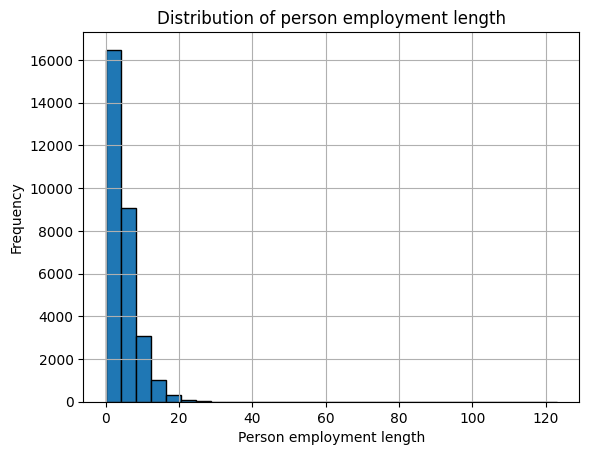

In [227]:
df['person_emp_length'].hist(bins=30, edgecolor='black')
plt.xlabel('Person employment length')
plt.ylabel('Frequency') 
plt.title('Distribution of person employment length')
plt.show()  

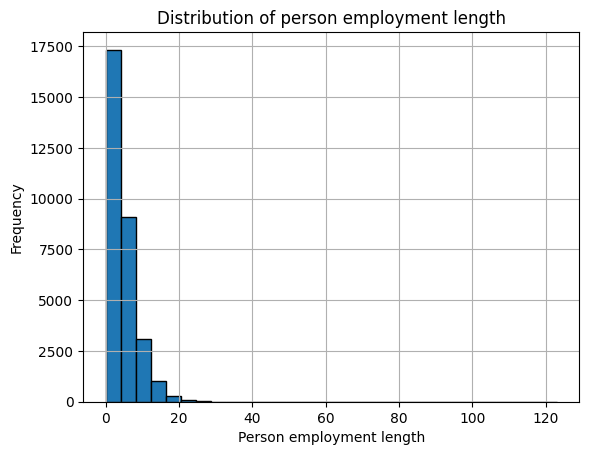

In [228]:
df['person_emp_length'] = df.groupby('age_group', observed=False)['person_emp_length'].transform(lambda x: x.fillna(x.median()))
df['person_emp_length'].hist(bins=30, edgecolor='black')
plt.xlabel('Person employment length')
plt.ylabel('Frequency') 
plt.title('Distribution of person employment length')
plt.show()  

In [229]:
df = df[df['person_emp_length'] < 50].copy()
bins = [0, 1, 3, 5, 10, 15, 20, 30, 50]
labels = ['<1', '1-3', '3-5', '5-10', '10-15', '15-20', '20-30', '30+']
df['emp_length_group'] = pd.cut(df['person_emp_length'], bins=bins, labels=labels, include_lowest=True)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,emp_length_group
1,21,9.17,OWN,5.00,EDUCATION,B,1000,11.14,0,0.10,N,2,20-30,3-5
2,25,9.17,MORTGAGE,1.00,MEDICAL,C,5500,12.87,1,0.57,N,3,20-30,<1
3,23,11.09,RENT,4.00,MEDICAL,C,35000,15.23,1,0.53,N,2,20-30,3-5
4,24,10.90,RENT,8.00,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-30,5-10
5,21,9.20,OWN,2.00,VENTURE,A,2500,7.14,1,0.25,N,2,20-30,1-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32575,52,11.07,RENT,0.00,EDUCATION,B,5000,11.26,0,0.08,N,20,50-60,<1
32576,57,10.88,MORTGAGE,1.00,PERSONAL,C,5800,13.16,0,0.11,N,30,50-60,<1
32577,54,11.70,MORTGAGE,4.00,PERSONAL,A,17625,7.49,0,0.15,N,19,50-60,3-5
32578,65,11.24,RENT,3.00,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,60+,1-3


### Loan amount

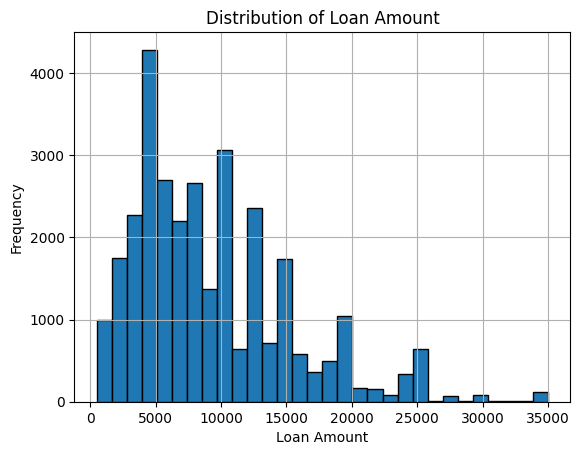

In [230]:
df['loan_amnt'].hist(bins=30, edgecolor='black')
plt.xlabel('Loan Amount')   
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')
plt.show()

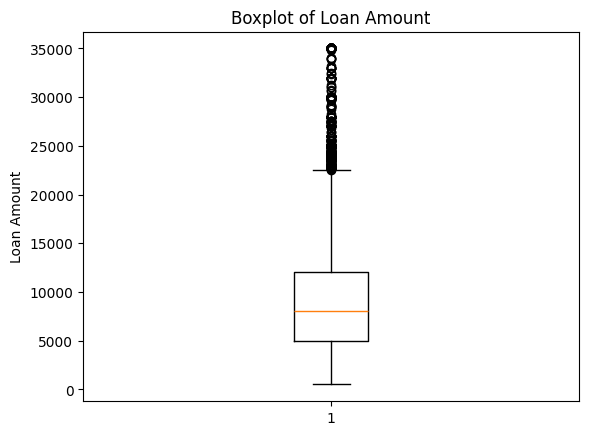

In [231]:
plt.boxplot(df['loan_amnt'])
plt.ylabel('Loan Amount')   
plt.title('Boxplot of Loan Amount')
plt.show()

In [232]:
df['loan_amnt'].skew()

np.float64(1.178350681395321)

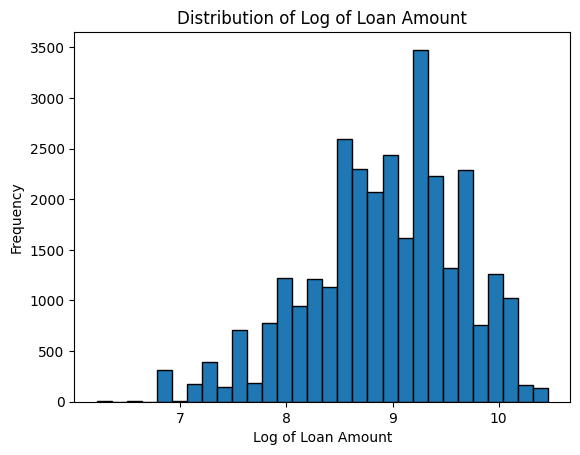

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,emp_length_group
1,21,9.17,OWN,5.00,EDUCATION,B,6.91,11.14,0,0.10,N,2,20-30,3-5
2,25,9.17,MORTGAGE,1.00,MEDICAL,C,8.61,12.87,1,0.57,N,3,20-30,<1
3,23,11.09,RENT,4.00,MEDICAL,C,10.46,15.23,1,0.53,N,2,20-30,3-5
4,24,10.90,RENT,8.00,MEDICAL,C,10.46,14.27,1,0.55,Y,4,20-30,5-10
5,21,9.20,OWN,2.00,VENTURE,A,7.82,7.14,1,0.25,N,2,20-30,1-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32575,52,11.07,RENT,0.00,EDUCATION,B,8.52,11.26,0,0.08,N,20,50-60,<1
32576,57,10.88,MORTGAGE,1.00,PERSONAL,C,8.67,13.16,0,0.11,N,30,50-60,<1
32577,54,11.70,MORTGAGE,4.00,PERSONAL,A,9.78,7.49,0,0.15,N,19,50-60,3-5
32578,65,11.24,RENT,3.00,HOMEIMPROVEMENT,B,10.46,10.99,1,0.46,N,28,60+,1-3


In [233]:
df['loan_amnt'] = np.log(df['loan_amnt'])
plt.hist(df['loan_amnt'], bins=30, edgecolor='black')
plt.xlabel('Log of Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Log of Loan Amount')
plt.show()
df

In [234]:
df['loan_amnt'].skew()

np.float64(-0.46088454243486376)

### Loan interest rate

In [235]:
df['loan_int_rate'] = df.groupby('loan_grade', observed=False)['loan_int_rate'].transform(lambda x: x.fillna(x.median()))

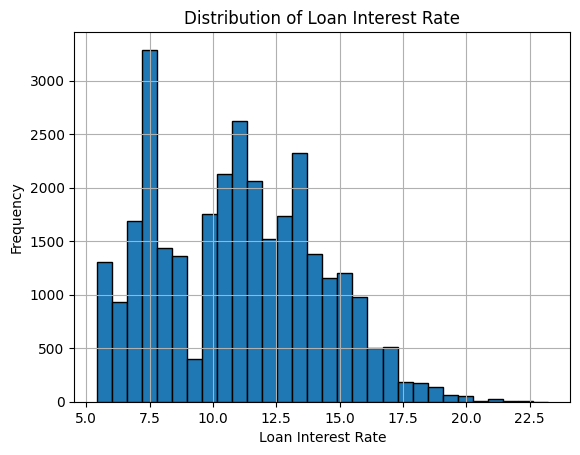

In [236]:
df['loan_int_rate'].hist(bins=30, edgecolor='black')
plt.xlabel('Loan Interest Rate')
plt.ylabel('Frequency') 
plt.title('Distribution of Loan Interest Rate')
plt.show()  

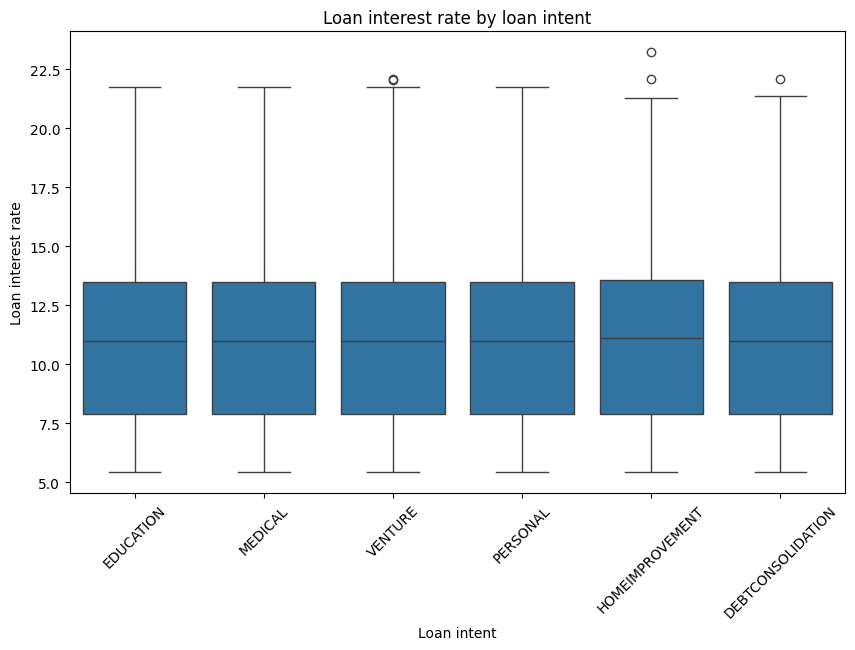

In [237]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_intent', y='loan_int_rate', data=df)
plt.title('Loan interest rate by loan intent')
plt.xlabel('Loan intent')
plt.xticks(rotation=45)
plt.ylabel('Loan interest rate')
plt.show()

### Loan percent income

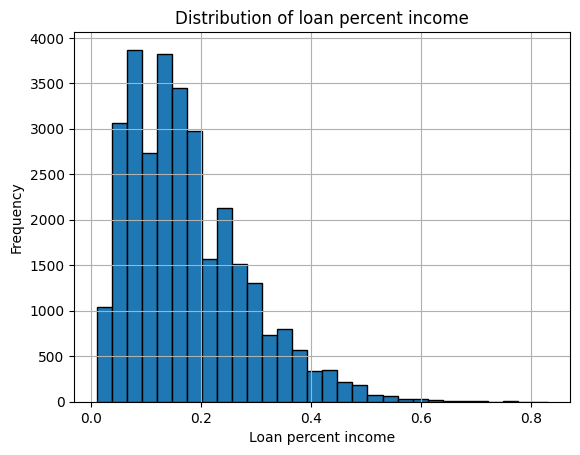

In [238]:
df['loan_percent_income'].hist(bins=30, edgecolor='black')
plt.xlabel('Loan percent income')
plt.ylabel('Frequency')
plt.title('Distribution of loan percent income')
plt.show()

### Personal credit history length

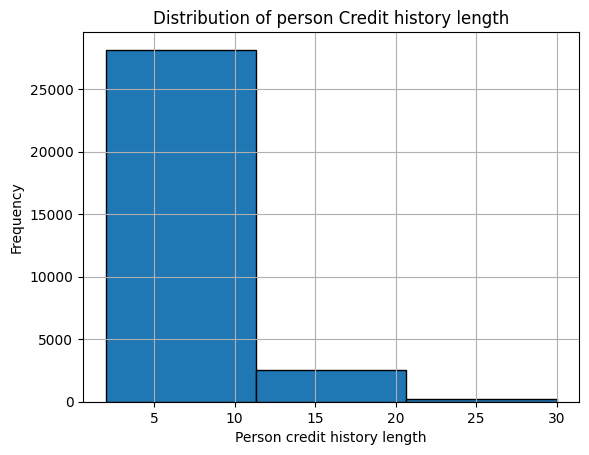

In [239]:
df['cb_person_cred_hist_length'].hist(bins=3, edgecolor='black')
plt.xlabel('Person credit history length')
plt.ylabel('Frequency') 
plt.title('Distribution of person Credit history length')
plt.show()

### Historical default

In [240]:
df['cb_person_default_on_file'].value_counts()


cb_person_default_on_file
N    25469
Y     5452
Name: count, dtype: int64

In [241]:
df['cb_person_default_on_file'] = (df['cb_person_default_on_file'] == 'Y').astype(int)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,emp_length_group
1,21,9.17,OWN,5.00,EDUCATION,B,6.91,11.14,0,0.10,0,2,20-30,3-5
2,25,9.17,MORTGAGE,1.00,MEDICAL,C,8.61,12.87,1,0.57,0,3,20-30,<1
3,23,11.09,RENT,4.00,MEDICAL,C,10.46,15.23,1,0.53,0,2,20-30,3-5
4,24,10.90,RENT,8.00,MEDICAL,C,10.46,14.27,1,0.55,1,4,20-30,5-10
5,21,9.20,OWN,2.00,VENTURE,A,7.82,7.14,1,0.25,0,2,20-30,1-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32575,52,11.07,RENT,0.00,EDUCATION,B,8.52,11.26,0,0.08,0,20,50-60,<1
32576,57,10.88,MORTGAGE,1.00,PERSONAL,C,8.67,13.16,0,0.11,0,30,50-60,<1
32577,54,11.70,MORTGAGE,4.00,PERSONAL,A,9.78,7.49,0,0.15,0,19,50-60,3-5
32578,65,11.24,RENT,3.00,HOMEIMPROVEMENT,B,10.46,10.99,1,0.46,0,28,60+,1-3


### Categorial features

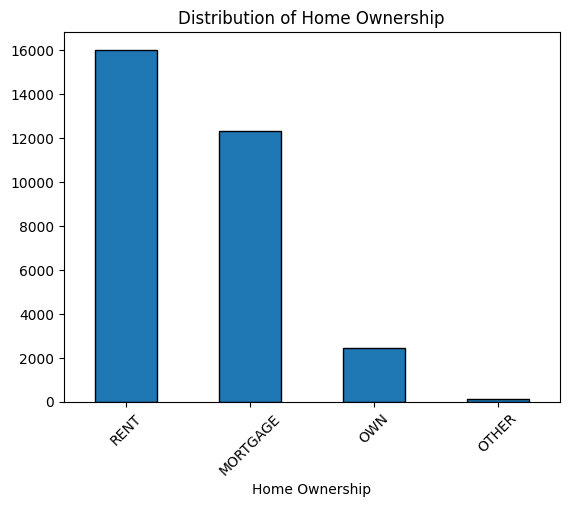

In [242]:
df['person_home_ownership'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.xticks(rotation=45)
plt.show()

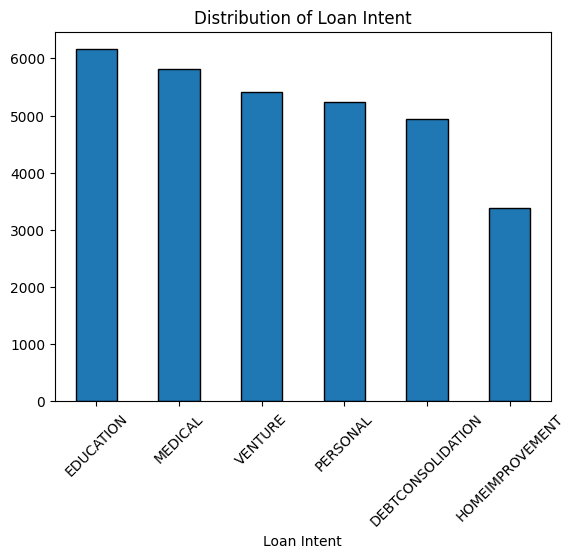

In [243]:
df['loan_intent'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribution of Loan Intent')
plt.xlabel('Loan Intent')
plt.xticks(rotation=45)
plt.show()

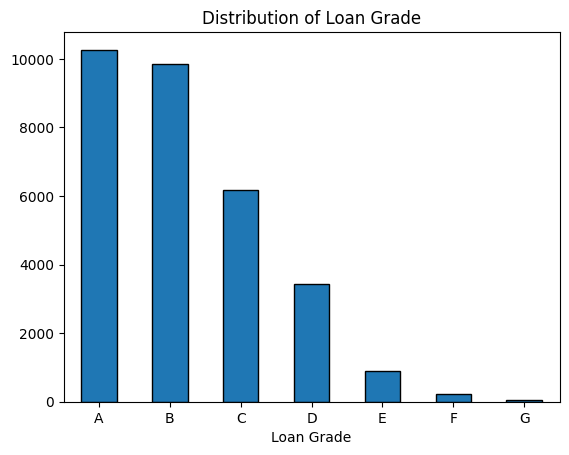

In [244]:
df['loan_grade'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribution of Loan Grade')
plt.xlabel('Loan Grade')
plt.xticks(rotation=0)
plt.show()

### Correlation analysis

In [245]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9.17,5.00,6.91,11.14,0,0.10,0,2
2,25,9.17,1.00,8.61,12.87,1,0.57,0,3
3,23,11.09,4.00,10.46,15.23,1,0.53,0,2
4,24,10.90,8.00,10.46,14.27,1,0.55,1,4
5,21,9.20,2.00,7.82,7.14,1,0.25,0,2
...,...,...,...,...,...,...,...,...,...
32575,52,11.07,0.00,8.52,11.26,0,0.08,0,20
32576,57,10.88,1.00,8.67,13.16,0,0.11,0,30
32577,54,11.70,4.00,9.78,7.49,0,0.15,0,19
32578,65,11.24,3.00,10.46,10.99,1,0.46,0,28


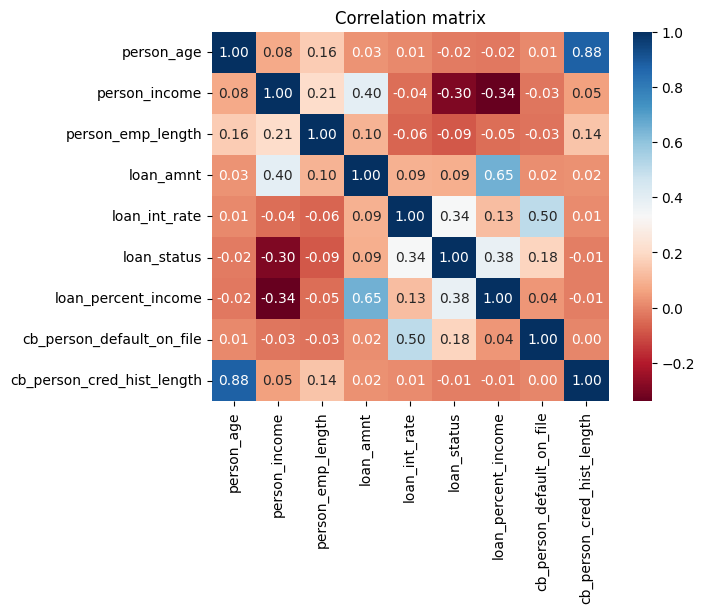

In [246]:
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt='.2f')
plt.title('Correlation matrix')
plt.show()

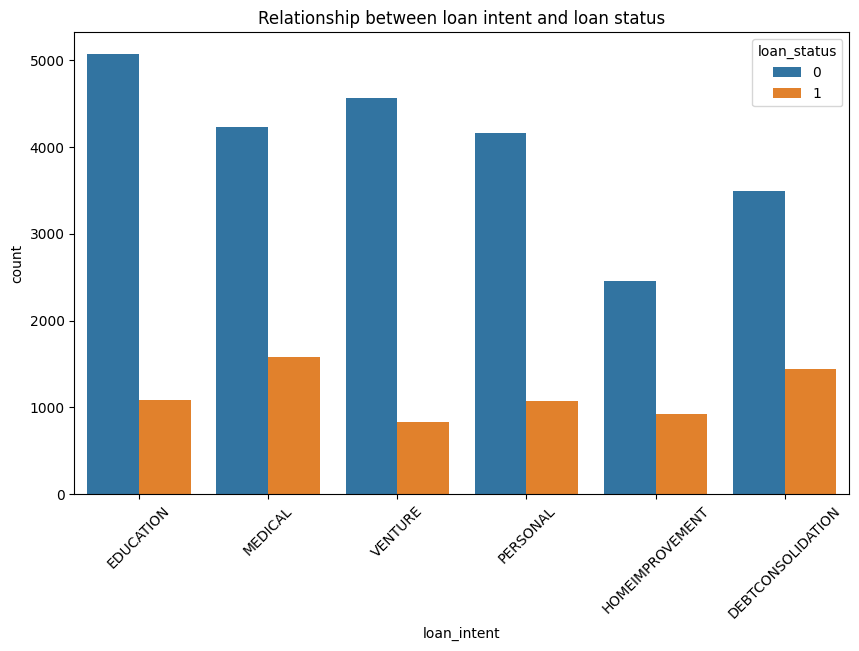

In [247]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'loan_intent', hue = 'loan_status')
plt.title("Relationship between loan intent and loan status")
plt.xticks(rotation=45)
plt.show()

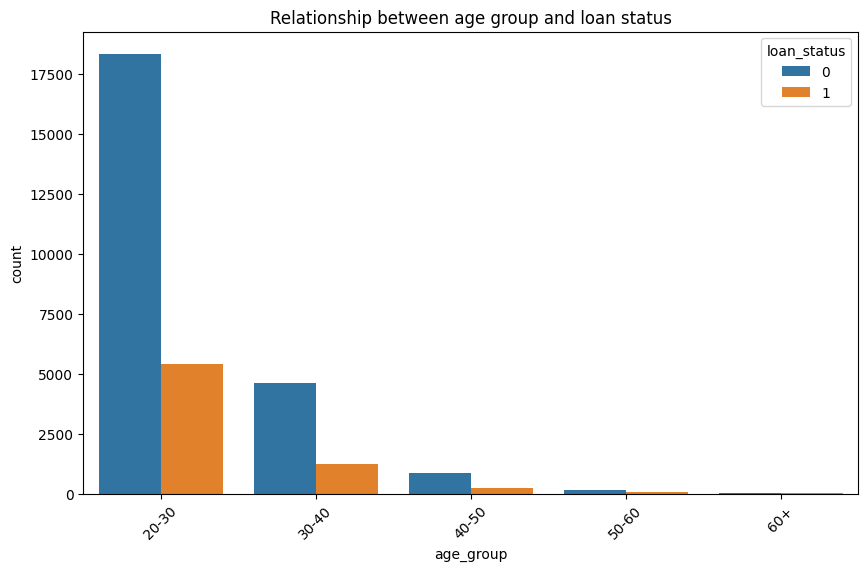

In [248]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'age_group', hue = 'loan_status')
plt.title("Relationship between age group and loan status")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='person_age', ylabel='count'>

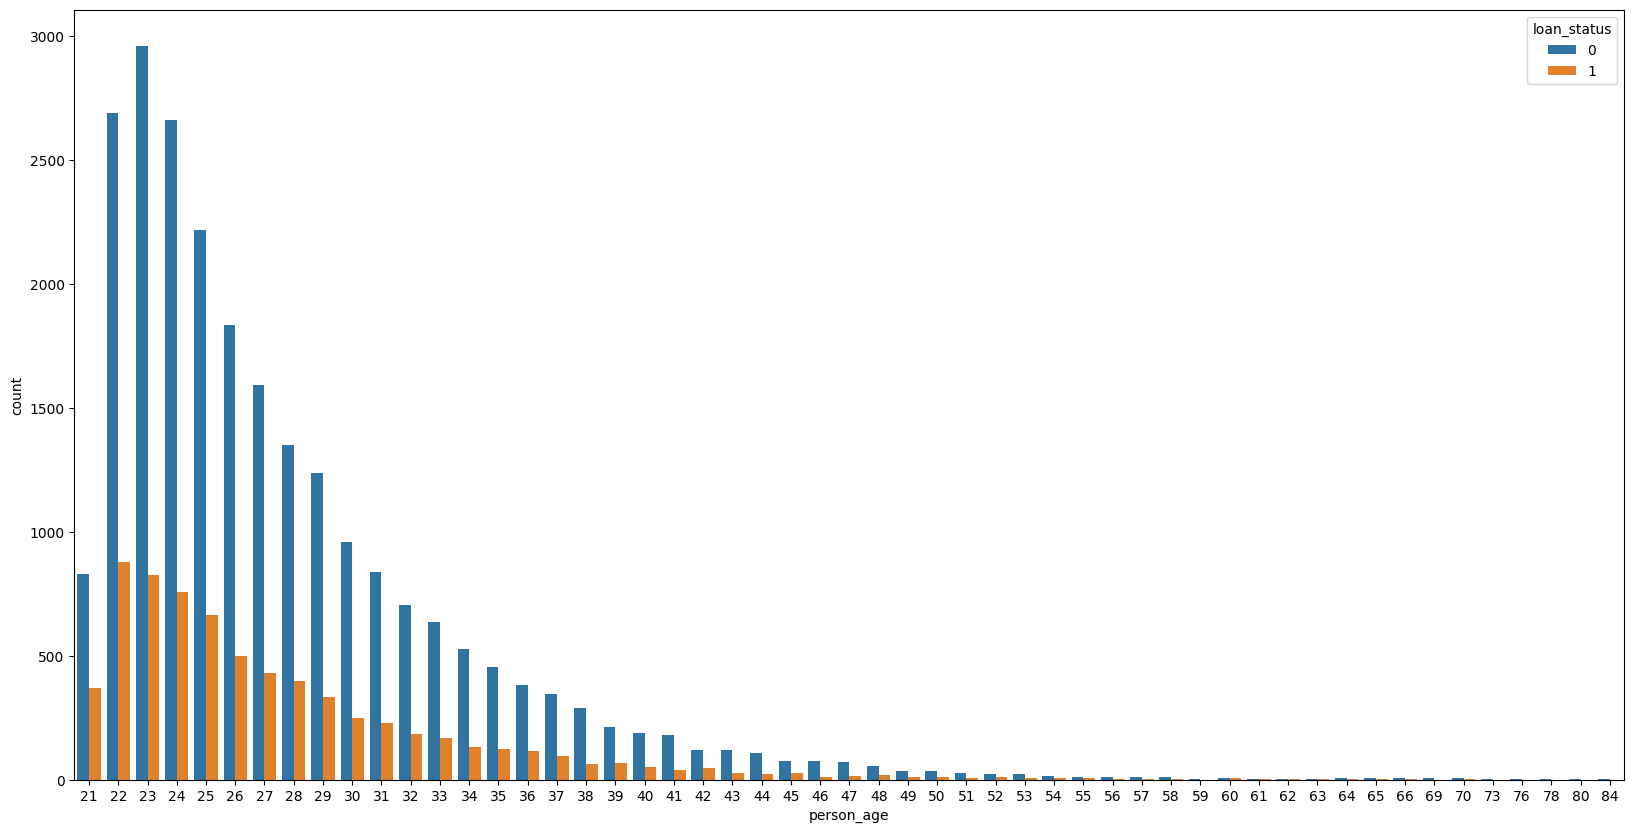

In [249]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'person_age', hue='loan_status', data = df)

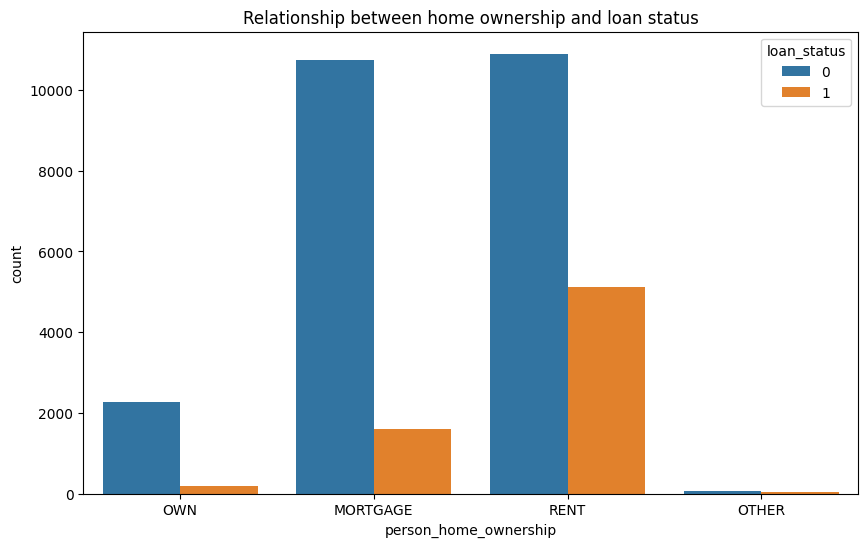

In [250]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'person_home_ownership', hue = 'loan_status')
plt.title("Relationship between home ownership and loan status")
plt.show()

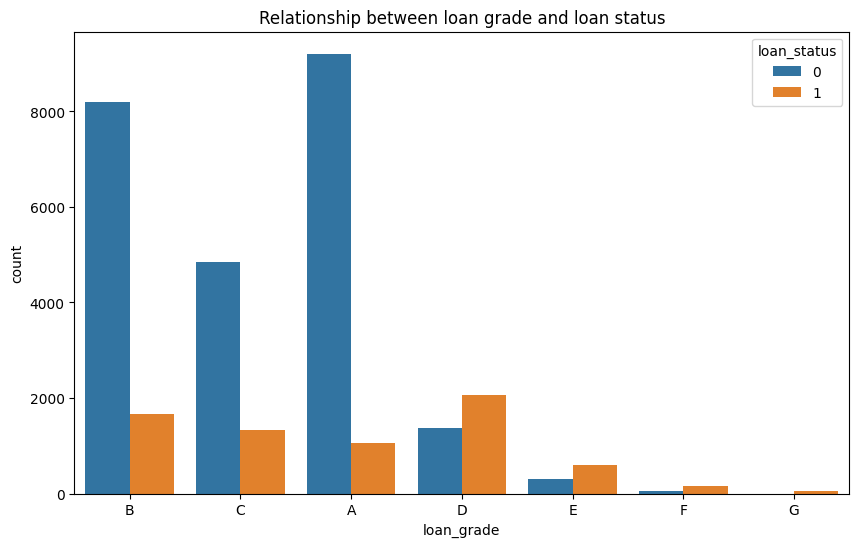

In [251]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'loan_grade', hue = 'loan_status')
plt.title("Relationship between loan grade and loan status")
plt.show()

In [252]:
grades = [['A', 'B', 'C', 'D', 'E', 'F', 'G']]
ord_enc = OrdinalEncoder(categories=grades)
df[['loan_grade_enc']] = ord_enc.fit_transform(df[['loan_grade']])
df


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,emp_length_group,loan_grade_enc
1,21,9.17,OWN,5.00,EDUCATION,B,6.91,11.14,0,0.10,0,2,20-30,3-5,1.00
2,25,9.17,MORTGAGE,1.00,MEDICAL,C,8.61,12.87,1,0.57,0,3,20-30,<1,2.00
3,23,11.09,RENT,4.00,MEDICAL,C,10.46,15.23,1,0.53,0,2,20-30,3-5,2.00
4,24,10.90,RENT,8.00,MEDICAL,C,10.46,14.27,1,0.55,1,4,20-30,5-10,2.00
5,21,9.20,OWN,2.00,VENTURE,A,7.82,7.14,1,0.25,0,2,20-30,1-3,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32575,52,11.07,RENT,0.00,EDUCATION,B,8.52,11.26,0,0.08,0,20,50-60,<1,1.00
32576,57,10.88,MORTGAGE,1.00,PERSONAL,C,8.67,13.16,0,0.11,0,30,50-60,<1,2.00
32577,54,11.70,MORTGAGE,4.00,PERSONAL,A,9.78,7.49,0,0.15,0,19,50-60,3-5,0.00
32578,65,11.24,RENT,3.00,HOMEIMPROVEMENT,B,10.46,10.99,1,0.46,0,28,60+,1-3,1.00


In [253]:
ohe_col = ['person_home_ownership', 'loan_intent']
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded = ohe.fit_transform(df[ohe_col])
encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [254]:
ohe.get_feature_names_out(ohe_col)

array(['person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'], dtype=object)

In [255]:
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(ohe_col))
encoded_df

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
3,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
4,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...
30916,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
30917,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
30918,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
30919,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00


In [256]:
df.reset_index(drop=True, inplace=True)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,emp_length_group,loan_grade_enc
0,21,9.17,OWN,5.00,EDUCATION,B,6.91,11.14,0,0.10,0,2,20-30,3-5,1.00
1,25,9.17,MORTGAGE,1.00,MEDICAL,C,8.61,12.87,1,0.57,0,3,20-30,<1,2.00
2,23,11.09,RENT,4.00,MEDICAL,C,10.46,15.23,1,0.53,0,2,20-30,3-5,2.00
3,24,10.90,RENT,8.00,MEDICAL,C,10.46,14.27,1,0.55,1,4,20-30,5-10,2.00
4,21,9.20,OWN,2.00,VENTURE,A,7.82,7.14,1,0.25,0,2,20-30,1-3,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30916,52,11.07,RENT,0.00,EDUCATION,B,8.52,11.26,0,0.08,0,20,50-60,<1,1.00
30917,57,10.88,MORTGAGE,1.00,PERSONAL,C,8.67,13.16,0,0.11,0,30,50-60,<1,2.00
30918,54,11.70,MORTGAGE,4.00,PERSONAL,A,9.78,7.49,0,0.15,0,19,50-60,3-5,0.00
30919,65,11.24,RENT,3.00,HOMEIMPROVEMENT,B,10.46,10.99,1,0.46,0,28,60+,1-3,1.00


In [257]:
df = pd.concat([df, encoded_df], axis = 1)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,emp_length_group,loan_grade_enc,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,21,9.17,OWN,5.00,EDUCATION,B,6.91,11.14,0,0.10,...,3-5,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
1,25,9.17,MORTGAGE,1.00,MEDICAL,C,8.61,12.87,1,0.57,...,<1,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,23,11.09,RENT,4.00,MEDICAL,C,10.46,15.23,1,0.53,...,3-5,2.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
3,24,10.90,RENT,8.00,MEDICAL,C,10.46,14.27,1,0.55,...,5-10,2.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
4,21,9.20,OWN,2.00,VENTURE,A,7.82,7.14,1,0.25,...,1-3,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30916,52,11.07,RENT,0.00,EDUCATION,B,8.52,11.26,0,0.08,...,<1,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
30917,57,10.88,MORTGAGE,1.00,PERSONAL,C,8.67,13.16,0,0.11,...,<1,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
30918,54,11.70,MORTGAGE,4.00,PERSONAL,A,9.78,7.49,0,0.15,...,3-5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
30919,65,11.24,RENT,3.00,HOMEIMPROVEMENT,B,10.46,10.99,1,0.46,...,1-3,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00


In [258]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'emp_length_group', 'loan_grade_enc', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [259]:
proceeded_data = df[['person_age', 'person_income','person_emp_length', 
       'loan_amnt','loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_grade_enc', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_status']]
proceeded_data


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_enc,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_status
0,21,9.17,5.00,6.91,11.14,0.10,0,2,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0
1,25,9.17,1.00,8.61,12.87,0.57,0,3,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1
2,23,11.09,4.00,10.46,15.23,0.53,0,2,2.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1
3,24,10.90,8.00,10.46,14.27,0.55,1,4,2.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1
4,21,9.20,2.00,7.82,7.14,0.25,0,2,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30916,52,11.07,0.00,8.52,11.26,0.08,0,20,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0
30917,57,10.88,1.00,8.67,13.16,0.11,0,30,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0
30918,54,11.70,4.00,9.78,7.49,0.15,0,19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0
30919,65,11.24,3.00,10.46,10.99,0.46,0,28,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1


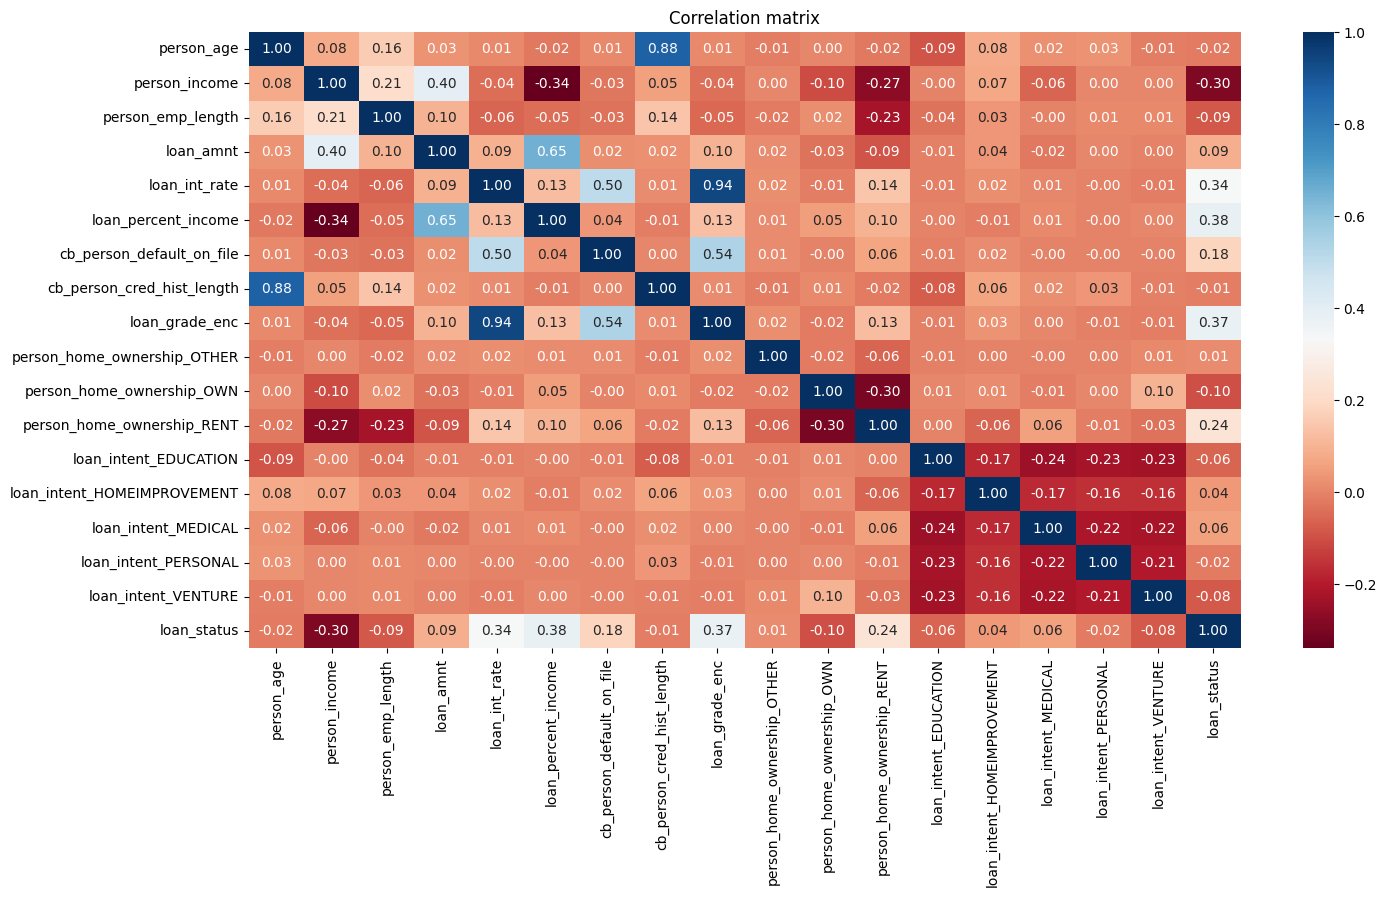

In [260]:
plt.figure(figsize=(16,8))
sns.heatmap(proceeded_data.corr(), annot=True, cmap='RdBu', fmt='.2f')
plt.title('Correlation matrix')
plt.show()

In [269]:
proceeded_data.drop(columns=['loan_grade_enc'], inplace=True)

C:\Users\arina\AppData\Local\Temp\ipykernel_6892\2674808034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proceeded_data.drop(columns=['loan_grade_enc'], inplace=True)


In [268]:
proceeded_data.loc[:, 'has_credit_history'] = (proceeded_data['cb_person_cred_hist_length'] > 0).astype(int)
proceeded_data.drop(columns=['cb_person_cred_hist_length', 'person_income', 'loan_amnt'], inplace=True)

C:\Users\arina\AppData\Local\Temp\ipykernel_6892\3135174744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proceeded_data.drop(columns=['cb_person_cred_hist_length', 'person_income', 'loan_amnt'], inplace=True)


In [270]:
proceeded_data

,person_age,person_emp_length,loan_int_rate,loan_percent_income,cb_person_default_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_status,has_credit_history
0,21,5.00,11.14,0.10,0,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0,1
1,25,1.00,12.87,0.57,0,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1,1
2,23,4.00,15.23,0.53,0,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1,1
3,24,8.00,14.27,0.55,1,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1,1
4,21,2.00,7.14,0.25,0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30916,52,0.00,11.26,0.08,0,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0,1
30917,57,1.00,13.16,0.11,0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0,1
30918,54,4.00,7.49,0.15,0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0,1
30919,65,3.00,10.99,0.46,0,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1,1


In [274]:
proceeded_data.to_csv('credit_data_processed.csv', index=False)